## Import Libraries

In [1]:
## import all the necessary modules for Exploratory Data Analysis, Linear Models and Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from math import log
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNet, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split


## Load and explore the dataframe

In [2]:
# Load the training data
train_lm = pd.read_csv('train_df_final.csv')

In [3]:
# Check the first three observations
train_lm.head(3)

,3SsnPorch,Bathrooms,BedroomAbvGr,BsmtCond,BsmtQual,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,3.5,3,4,2,0,4,2,4,3,...,0,0,0,0,0,0,0,0,0,1
1,0,2.5,3,4,2,0,4,3,4,5,...,0,0,0,0,0,0,0,0,0,1
2,0,3.5,3,4,2,0,4,2,4,5,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Check the data information
train_lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 356 entries, 3SsnPorch to SaleType_WD
dtypes: float64(6), int64(350)
memory usage: 3.9 MB


In [5]:
# Drop the 'Id' column from the train dataset
train_lm.drop('Id', axis =1, inplace = True)

In [6]:
# Check the shape of the dataframe
train_lm.shape

(1453, 355)

## Split the data into Training and Testing Data

### Define the X and y variables

In [7]:
# Extract the target variable
y = train_lm['SalePrice_log']

In [8]:
# Drop the unneeded columns
X = train_lm.drop('SalePrice_log', axis = 1)

In [9]:
#Now that we've explored the data a bit, split the data into training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Base Model - Multiple Linear Regression

### Create an instance of a LinearRegression() model named lm.

In [10]:
# Instantiate a linear model
lm = LinearRegression()

In [11]:
# Fit the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [12]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print ('Intercept: \n', lm.intercept_)

Coefficients: 
 [ 1.57577581e-04  3.46325460e-02 -2.02001462e-03  9.86538539e-03
 -2.77475063e-03  1.85890406e-04 -5.15246972e-04  7.32602481e-03
  2.94056567e-03 -1.17400382e-03  2.21123808e-02  1.05699943e-04
 -4.19505633e-04  5.97478340e-03  2.25104007e-04 -4.65564346e-03
 -3.56516786e-02 -1.81408747e-02  5.73794778e-06  5.92191363e-04
  1.74638206e-05  4.37509332e-05  1.48058293e-04  3.99358945e-02
  4.21957165e-02  5.26829488e-04  1.70852646e-01  2.03626147e-04
  1.18972407e-04  1.31930053e-04 -7.95093846e-02 -1.55712347e-01
 -3.81776504e-01  2.92805895e-02 -6.18412598e-03 -1.84775416e-02
  1.38093192e-01  1.69417611e-02  1.70228182e-02 -5.48851912e-03
  1.73036291e-02 -9.32032229e-14 -4.67663400e-02  3.01273709e-02
  4.13679322e-03  4.00920131e-01  3.24843371e-01  3.49816510e-01
  3.36037425e-01  4.96011105e-02 -3.47072967e-02 -3.13622890e-02
 -3.58958270e-03 -2.97025836e-03  5.28177959e-03  3.91501171e-02
 -2.55729579e-02 -9.64249053e-02 -5.16210492e-03  1.44077297e-02
 -3.17237

### Predicting on Hold Out Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [13]:
# Use lm.predict() to predict off the X_test set of the data
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

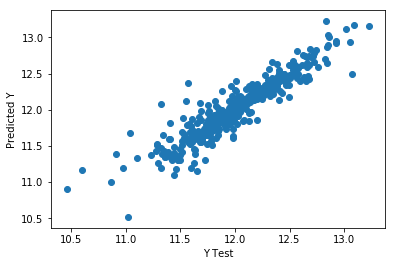

In [14]:
# Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
# calculate these metrics by hand!
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.104058096859164
MSE: 0.02435950877016429
RMSE: 0.1560753304342627


### Residuals

Got a decent model with a good fit. Plot the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

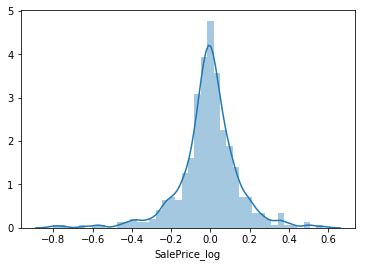

In [16]:
sns.distplot(y_test - predictions)

### Conclusion
** Recreate the dataframe below. **

In [17]:
# Convert the coefficient into a dataframe
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by='Coeffecient', ascending = False)

,Coeffecient
MiscFeature_Othr,0.781389
MiscFeature_None,0.661644
RoofStyle_Shed,0.654457
MiscFeature_Shed,0.604415
RoofMatl_Membran,0.527856
Condition2_Feedr,0.496653
MiscFeature_TenC,0.446566
Condition2_RRNn,0.439525
MSZoning_FV,0.400920
HouseStyle_1.5Unf,0.397910


## LASSO REGRESSION

Run LASSO with different alpha values(L1 penalties). 
Choose best L1 penalty using a crossvalidation. 
Choose best L1 penalty and test the model on the HoldOut Data.

In [18]:
alpha = np.linspace(0.00009, 0.01, num=20)
alpha

array([9.00000000e-05, 6.11578947e-04, 1.13315789e-03, 1.65473684e-03,
       2.17631579e-03, 2.69789474e-03, 3.21947368e-03, 3.74105263e-03,
       4.26263158e-03, 4.78421053e-03, 5.30578947e-03, 5.82736842e-03,
       6.34894737e-03, 6.87052632e-03, 7.39210526e-03, 7.91368421e-03,
       8.43526316e-03, 8.95684211e-03, 9.47842105e-03, 1.00000000e-02])

In [19]:
# We perform 5-fold cross-validation to choose the best alpha, 
# refit the mode, compute the associated test error  
# print the best models coefficients .

In [20]:
lasso_train_model_ = Lasso(max_iter=10000, normalize=True)

In [21]:
lasso_train_model_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso_train_model_.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)

Alpha= 0.00014312304566003038


In [33]:
lasso_train_model_.fit(X_train, y_train)
print("mse = ",MSE(y_test, lasso_train_model_.predict(X_test)))
print("rmse = ",np.sqrt(MSE(y_test, lasso_train_model_.predict(X_test))))

print("best model coefficients:")
pd.Series(lasso_train_model_.coef_, index=X.columns)

mse =  0.015854681601726924
rmse =  0.12591537476308015
best model coefficients:


3SsnPorch               0.000000
Bathrooms               0.038962
BedroomAbvGr            0.000000
BsmtCond                0.007960
BsmtQual               -0.013162
EnclosedPorch           0.000000
ExterCond               0.000000
ExterQual              -0.004174
Fence                   0.000000
FireplaceQu            -0.000000
Fireplaces              0.020218
GarageArea              0.000139
GarageCond              0.000000
GarageQual              0.002243
GrLivArea               0.000215
HeatingQC              -0.007139
KitchenAbvGr           -0.033212
KitchenQual            -0.011473
LotArea                 0.000003
LotFrontage             0.000492
MasVnrArea              0.000017
MiscVal                 0.000000
OpenPorchSF             0.000163
OverallCond             0.035375
OverallQual             0.065428
PoolArea                0.000000
PoolQC                  0.000000
ScreenPorch             0.000072
TotalBsmtSF             0.000123
WoodDeckSF              0.000080
          

In [34]:
Lasso_coef_df = pd.Series(lasso_train_model_.coef_, index = X_train.columns).sort_values(ascending = False)

In [35]:
top_15_features = Lasso_coef_df[:15]

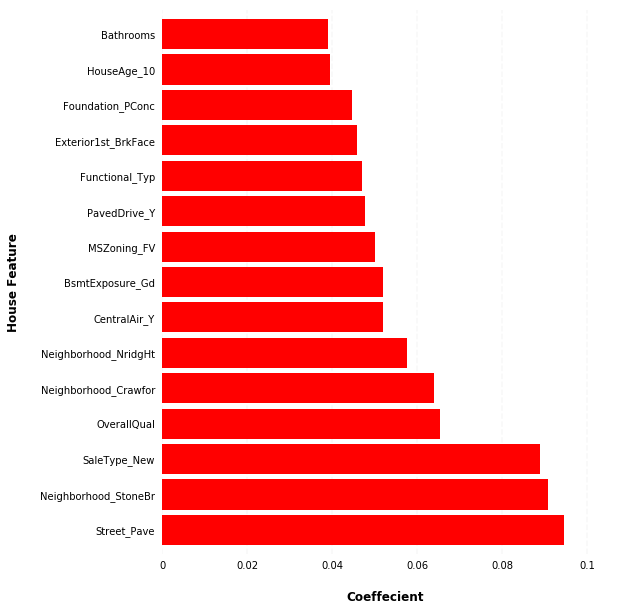

In [36]:
ax = top_15_features.plot(kind = 'barh', figsize = (8,10), color = 'red', zorder = 2, width = 0.85)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Coeffecient", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("House Feature", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## RIDGE REGRESSION

Run Ridge with different alpha values(L1 penalties). 
Choose best L1 penalty using a crossvalidation. 
Choose best L1 penalty and test the model on the HoldOut Data.

In [37]:
# Define a range of l2_penalty functions
alphas = np.linspace(.1, 100, num=300)

In [39]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, y_train)
print("mse = {}".format(MSE(y_test, ridge.predict(X_test))))
print("rmse = {}".format (np.sqrt(MSE(y_test, ridge.predict(X_test)))))

print("best model coefficients:")
pd.Series(ridge.coef_, index=X.columns)

Alpha= 0.1
mse = 0.019217735829092326
rmse = 0.13862804849341392
best model coefficients:


3SsnPorch               0.000129
Bathrooms               0.037046
BedroomAbvGr            0.011101
BsmtCond                0.009459
BsmtQual               -0.011354
EnclosedPorch           0.000128
ExterCond               0.003696
ExterQual              -0.008667
Fence                   0.002383
FireplaceQu            -0.002539
Fireplaces              0.027030
GarageArea              0.000120
GarageCond              0.000842
GarageQual              0.004882
GrLivArea               0.000148
HeatingQC              -0.006618
KitchenAbvGr           -0.025898
KitchenQual            -0.019297
LotArea                 0.000004
LotFrontage             0.000709
MasVnrArea              0.000042
MiscVal                 0.000005
OpenPorchSF             0.000230
OverallCond             0.031072
OverallQual             0.041712
PoolArea                0.000262
PoolQC                  0.067551
ScreenPorch             0.000182
TotalBsmtSF             0.000120
WoodDeckSF              0.000137
          

In [40]:
Ridge_coef_df = pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending = False)[:15]

In [41]:
top_15_ridge_features = Ridge_coef_df[:15]

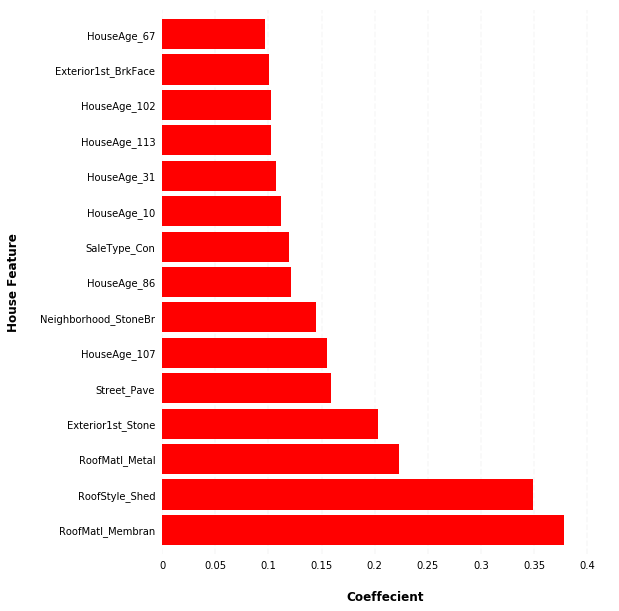

In [42]:
ax = top_15_ridge_features.plot(kind = 'barh', figsize = (8,10), color = 'red', zorder = 2, width = 0.85)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Coeffecient", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("House Feature", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## ElasticNet

In [43]:
ElasticNet_model_ = linear_model.ElasticNet(max_iter=10000, normalize=True)

In [44]:
ElasticNet_model_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
ElaNetCV = linear_model.ElasticNetCV(n_alphas=100, normalize=True, cv=5, l1_ratio= 0.5)
ElaNetCV.fit(X_train, y_train)
print("Alpha=", ElaNetCV.alpha_)

#predictions = ElaNet.predict(X_test)
#score
#print('RMSE: {}'.format(MSE(predictions,y_test)))
#print('RMSE: {}'.format(np.sqrt(MSE(predictions,y_test))))

Alpha= 0.00018833081390783236


In [46]:
ElasticNet_model_ = linear_model.ElasticNet(alpha=ElaNetCV.alpha_, normalize=True)
ElasticNet_model_.fit(X_train, y_train)
print("mse = {}".format(MSE(y_test, ElasticNet_model_.predict(X_test))))
print("rmse = {}".format (np.sqrt(MSE(y_test, ElasticNet_model_.predict(X_test)))))

mse = 0.016266414673276955
rmse = 0.12753985523465577
